### Loading Dataset


In [1]:
import numpy as np
import pandas as pd
import random

df = pd.read_csv('/kaggle/input/phishing-url-detection/out.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   source              object 
 2   label               object 
 3   url_length          int64  
 4   starts_with_ip      bool   
 5   url_entropy         float64
 6   has_punycode        bool   
 7   digit_letter_ratio  float64
 8   dot_count           int64  
 9   at_count            int64  
 10  dash_count          int64  
 11  tld_count           int64  
 12  domain_has_digits   bool   
 13  subdomain_count     int64  
 14  nan_char_entropy    float64
 15  has_internal_links  bool   
 16  whois_data          object 
 17  domain_age_days     float64
dtypes: bool(4), float64(4), int64(6), object(4)
memory usage: 276.6+ MB


,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.0,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.0,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.0,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0


### Dropping Null Rows

In [2]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1749311 entries, 0 to 2499998
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   source              object 
 2   label               object 
 3   url_length          int64  
 4   starts_with_ip      bool   
 5   url_entropy         float64
 6   has_punycode        bool   
 7   digit_letter_ratio  float64
 8   dot_count           int64  
 9   at_count            int64  
 10  dash_count          int64  
 11  tld_count           int64  
 12  domain_has_digits   bool   
 13  subdomain_count     int64  
 14  nan_char_entropy    float64
 15  has_internal_links  bool   
 16  whois_data          object 
 17  domain_age_days     float64
dtypes: bool(4), float64(4), int64(6), object(4)
memory usage: 206.9+ MB


### One-Hot Encoding

In [3]:
df['label'].value_counts()

label
legitimate    1096403
phishing       652908
Name: count, dtype: int64

In [4]:
df['is_phishing'] = df['label'].apply(lambda x: True if x == 'phishing' else False)
df.drop('label', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1749311 entries, 0 to 2499998
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   source              object 
 2   url_length          int64  
 3   starts_with_ip      bool   
 4   url_entropy         float64
 5   has_punycode        bool   
 6   digit_letter_ratio  float64
 7   dot_count           int64  
 8   at_count            int64  
 9   dash_count          int64  
 10  tld_count           int64  
 11  domain_has_digits   bool   
 12  subdomain_count     int64  
 13  nan_char_entropy    float64
 14  has_internal_links  bool   
 15  whois_data          object 
 16  domain_age_days     float64
 17  is_phishing         bool   
dtypes: bool(5), float64(4), int64(6), object(3)
memory usage: 195.2+ MB


In [5]:
df['source'].value_counts()

source
Phishing.Database      583980
Cisco-Umbrella         554239
Majestic               542164
PhishTank               68572
OpenPhish-Community       356
Name: count, dtype: int64

In [6]:
df = pd.get_dummies(df, columns=['source'], prefix='source')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1749311 entries, 0 to 2499998
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   url                         object 
 1   url_length                  int64  
 2   starts_with_ip              bool   
 3   url_entropy                 float64
 4   has_punycode                bool   
 5   digit_letter_ratio          float64
 6   dot_count                   int64  
 7   at_count                    int64  
 8   dash_count                  int64  
 9   tld_count                   int64  
 10  domain_has_digits           bool   
 11  subdomain_count             int64  
 12  nan_char_entropy            float64
 13  has_internal_links          bool   
 14  whois_data                  object 
 15  domain_age_days             float64
 16  is_phishing                 bool   
 17  source_Cisco-Umbrella       bool   
 18  source_Majestic             bool   
 19  source_OpenPhish-Community

,url,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,...,nan_char_entropy,has_internal_links,whois_data,domain_age_days,is_phishing,source_Cisco-Umbrella,source_Majestic,source_OpenPhish-Community,source_PhishTank,source_Phishing.Database
0,apaceast.cloudguest.central.arubanetworks.com,45,False,3.924535,False,0.0,4,0,0,0,...,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0,False,True,False,False,False,False
1,quintadonoval.com,17,False,3.572469,False,0.0,1,0,0,0,...,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0,False,False,True,False,False,False
2,nomadfactory.com,16,False,3.327820,False,0.0,1,0,0,0,...,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0,False,False,True,False,False,False
3,tvarenasport.com,16,False,3.500000,False,0.0,1,0,0,0,...,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0,False,False,True,False,False,False
4,widget.cluster.groovehq.com,27,False,3.930270,False,0.0,3,0,0,0,...,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0,False,True,False,False,False,False


### Showing Correlation Matrix

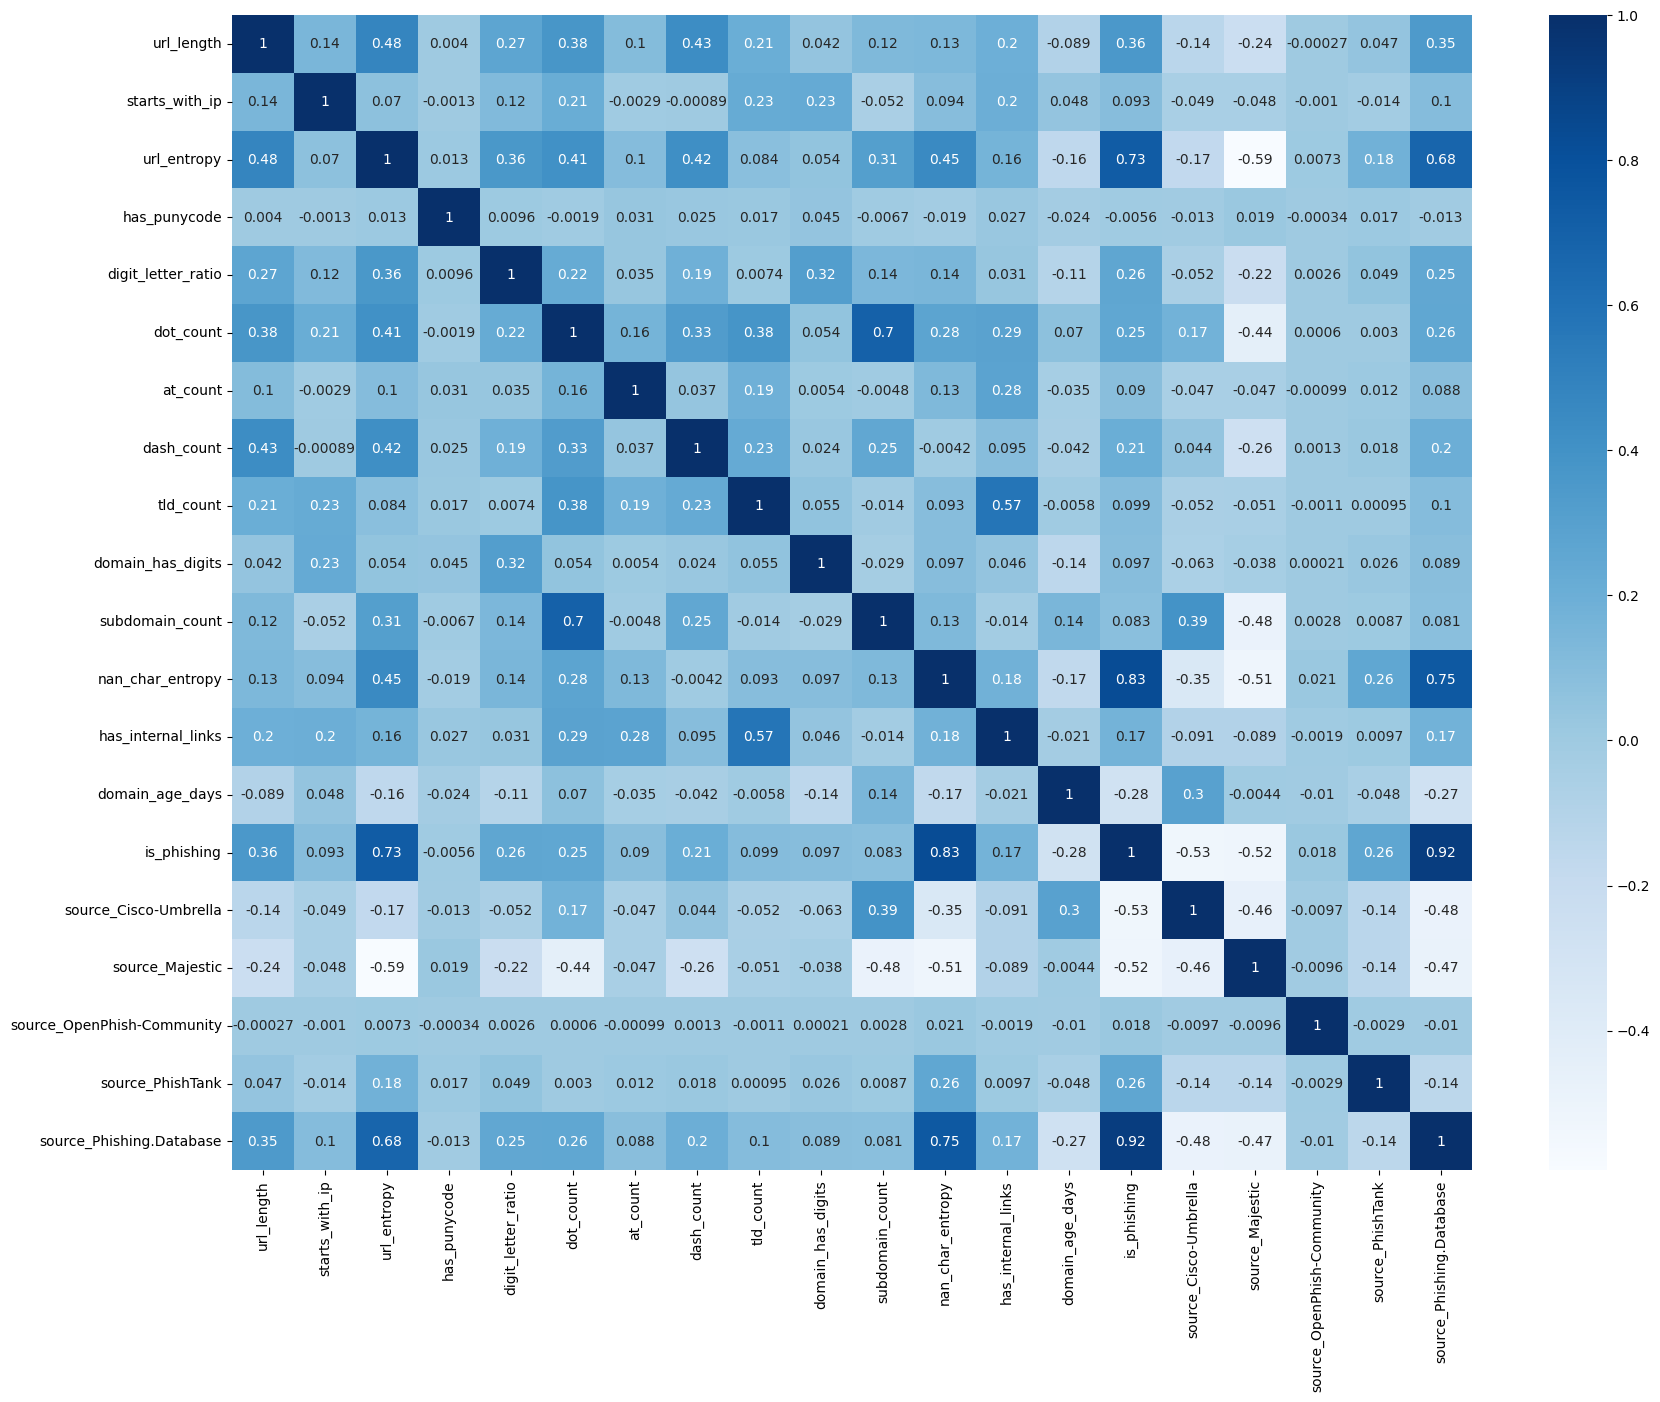

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
plt.show()

### Selecting Most Effective Rows

In [8]:
cor_target = abs(corr_matrix['is_phishing'])
relevant_features = cor_target[cor_target>0.15]
to_drop = cor_target[cor_target<0.15]

row_names = to_drop.to_frame().index
row_names_list = list(row_names)
row_names_list.append('is_phishing')

relevant_features, to_drop

(url_length                  0.357010
 url_entropy                 0.731814
 digit_letter_ratio          0.263784
 dot_count                   0.254177
 dash_count                  0.205876
 nan_char_entropy            0.830583
 has_internal_links          0.172293
 domain_age_days             0.281126
 is_phishing                 1.000000
 source_Cisco-Umbrella       0.525524
 source_Majestic             0.517161
 source_PhishTank            0.261747
 source_Phishing.Database    0.917347
 Name: is_phishing, dtype: float64,
 starts_with_ip                0.092746
 has_punycode                  0.005607
 at_count                      0.090172
 tld_count                     0.098657
 domain_has_digits             0.097149
 subdomain_count               0.082569
 source_OpenPhish-Community    0.018488
 Name: is_phishing, dtype: float64)

### Splitting Dataset

In [9]:
from sklearn.model_selection import train_test_split

df1 = df.sample(n=500_000)
y = df1['is_phishing'].values
X = df1.select_dtypes(['number', 'boolean']).drop(row_names_list, axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Supervised
### Using KNeighborsClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
steps = [('knn', knn_model)]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

### Fitting and Evaluating the Model Performance

In [11]:
from sklearn.metrics import classification_report

best_kneighbors = KNeighborsClassifier(n_neighbors=23)
best_kneighbors.fit(X_train, y_train)
y_pred = best_kneighbors.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97     94144
        True       0.96      0.94      0.95     55856

    accuracy                           0.96    150000
   macro avg       0.96      0.96      0.96    150000
weighted avg       0.96      0.96      0.96    150000



# Unsupervised
### Using IsolationForest

### Finding Contamination Ratio

In [12]:
df1['is_phishing'].value_counts(), len(df1[df1['is_phishing']])/len(df1['is_phishing'])

(is_phishing
 False    313229
 True     186771
 Name: count, dtype: int64,
 0.373542)

In [13]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.37, random_state=42)

isolation_forest.fit(X)

# Predict anomalies (1 for normal, -1 for anomaly)
labels = isolation_forest.predict(X)

anomalies = (labels == -1).sum()
phishing_count = len(df1[df1['is_phishing']])
print(f"Detected {anomalies}/{phishing_count} anomalies.")
anomalies/phishing_count

Detected 185000/186771 anomalies.


0.9905177998725713